In [212]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
#reading the dataset
data=pd.read_csv(r'C:\Users\parth\OneDrive\Desktop\Car_Price_ML\car data.csv')
print(data.shape)
data.head()

(301, 9)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# DATA PREPROCESSING 👇

In [214]:
#Checking if there are any missing values
data.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [215]:
# Checking cardinality/no. of unique values of independent categorical variables in the dataset

print('Seller Type :-  ',data['Seller_Type'].unique())
print('Fuel Type :- ',data['Fuel_Type'].unique())
print('Transmission :- ',data['Transmission'].unique())
print('Owner :- ',data['Owner'].unique())
print('Year :- ',data['Year'].unique())


Seller Type :-   ['Dealer' 'Individual']
Fuel Type :-  ['Petrol' 'Diesel' 'CNG']
Transmission :-  ['Manual' 'Automatic']
Owner :-  [0 1 3]
Year :-  [2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]


In [216]:

print('Unique elements in Car_Name are',data['Car_Name'].nunique())
#98 unique elements 
#so, rather than encoding (oneHot) it, we can just drop this columbn as it doesn' make sense

Unique elements in Car_Name are 98


In [217]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [218]:
#Dropping the Car_Name Column

dataset=data[['Year','Selling_Price','Present_Price','Kms_Driven',
              'Fuel_Type','Seller_Type','Transmission','Owner']]
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [219]:
#creating new  feature 'Car_Age'
dataset['Car_Age']= 2024 - dataset['Year']
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [220]:
#So, we can now drop 'Year' column

dataset.drop(labels=['Year'],axis=1,inplace=True)
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [221]:
#Encoding the Categorical attributes
#select categorical attributes from the dataset and then implement categorical encoding for nominal variables

#using oneHot Encoding.....
Fuel_Type=pd.get_dummies(Fuel_Type, drop_first=True).astype(int) #dropping one of the category
Seller_Type=pd.get_dummies(Seller_Type, drop_first=True).astype(int)
Transmission=pd.get_dummies(Transmission, drop_first=True).astype(int)


#concatenate
dataset=pd.concat([dataset,Fuel_Type, Seller_Type, Transmission], axis=1)


#Now dropping ['Fuel_Type', 'Seller_Type', 'Transmission']
dataset.drop(labels=['Fuel_Type', 'Seller_Type', 'Transmission'], axis=1, inplace=True)

dataset.head()


,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel_True,Fuel_Type_Petrol_True,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,0,1,0,1
1,4.75,9.54,43000,0,11,1,0,0,1
2,7.25,9.85,6900,0,7,0,1,0,1
3,2.85,4.15,5200,0,13,0,1,0,1
4,4.60,6.87,42450,0,10,1,0,0,1


In [222]:
#Now, we will look how one variable is related to each other

# Dataset Correlation
dataset.corr()
# 1 -> perfectly Related
#-1 -> Imperfectly Relaetd

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel_True,Fuel_Type_Petrol_True,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Car_Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel_True,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol_True,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


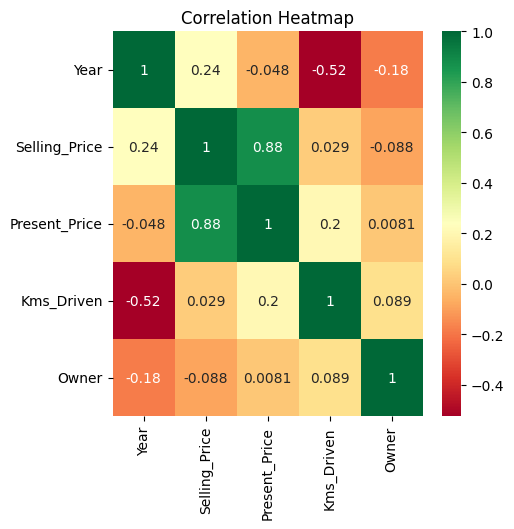

In [223]:
#Data Visualization and Correlation
#Correlations of features in dataset
df = pd.DataFrame(data)

# Select only numerical columns
numeric_data = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corrmat = numeric_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
sns.heatmap(numeric_data[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.title('Correlation Heatmap')
plt.show()

In [224]:
# #placing the 'Selling Price' at last Idx

# sell=dataset['Selling_Price']
# dataset.drop(['Selling_Price'], axis=1, inplace=True)
# dataset=dataset.join(sell)
# dataset.head()

[3.85242491e-01 4.41900954e-02 3.66720547e-04 7.53874190e-02
 2.23202499e-01 1.78768617e-02 1.19011957e-01 1.34721956e-01]


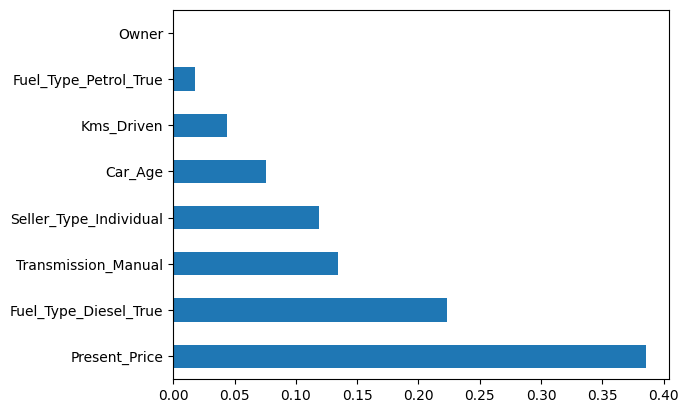

In [225]:
X = dataset.drop(['Selling_Price'], axis = 1)
y = dataset['Selling_Price']
### To determine important features, make use of ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

print(model.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#It shows, how each of the feature is related to Target Variable using ensemle learning

# TESTING AND TRAINING 👇


In [226]:
X = dataset.drop(['Selling_Price'], axis = 1)
y = dataset['Selling_Price']

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [245]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state = 0)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)


maeDT=mean_absolute_error(y_pred_dt, y_test)
print("Mean Absolute Error: " , maeDT)

mseDT=mean_squared_error(y_test, y_pred_dt)
print("Mean Squared Error: " , mseDT)

rmseDT =  np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt))
print('RMSE: ',rmseDT)

r2DT = metrics.r2_score(y_test, y_pred_dt)
print('The R2_score : ', r2DT)


Mean Absolute Error:  0.7083606557377048
Mean Squared Error:  1.4940639344262296
RMSE:  1.222319080447585
The R2_score :  0.9408931002601251


In [246]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

maeRF=mean_absolute_error(y_pred_rf, y_test)
print("Mean Absolute Error: " , maeRF)

mseRF=mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error: " , mseRF)

rmseRF =  np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
print('RMSE: ',rmseRF)

r2RF = metrics.r2_score(y_test, y_pred_rf)
print('The R2_score : ', r2RF)


Mean Absolute Error:  0.6194377049180328
Mean Squared Error:  1.0385724572131145
RMSE:  1.0191037519375123
The R2_score :  0.9589128706699787


In [247]:
#Linear Regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

maeLR=mean_absolute_error(y_pred_lr, y_test)
print("Mean Absolute Error: " , maeLR)

mseLR=mean_squared_error(y_test, y_pred_lr)
print("Mean Squared Error: " , mseLR)

rmseLR =  np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))
print('RMSE: ',rmseLR)

r2LR = metrics.r2_score(y_test, y_pred_lr)
print('The R2_score : ', r2LR)


Mean Absolute Error:  0.9937753386730447
Mean Squared Error:  2.1628715277875914
RMSE:  1.4706704347975421
The R2_score :  0.9144342972228519


In [230]:
#SVM
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Scaling features
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Initialize the SVM regressor
svm_regressor = SVR(kernel='rbf')  

# Train the model
svm_regressor.fit(X_train_scaled, y_train_scaled)

# Predict on the test data
y_pred_scaled = svm_regressor.predict(X_test_scaled)

# Inverse transform to get predictions in the original scale
y_pred_svm = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred_svm)
mse = mean_squared_error(y_test, y_pred_svm)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_svm)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 0.675844257721267
Mean Squared Error (MSE): 1.4737006365172571
Root Mean Squared Error (RMSE): 1.2139607228066553
R² Score: 0.9416986959111178


# HYPOTHESIS TESTING👇

In [233]:
#One Sample T-Test
#One-Sample t-test to compare the predicted car prices from your model with the actual prices 
from scipy import stats
y_pred_lr = y_pred_lr.ravel()  # Flatten the predictions to 1D
y_test = y_test.ravel()  # Flatten the actual values to 1D

# Perform One-Sample t-test by comparing the mean of y_pred_lr to the mean of y_test
popmean = y_test.mean()  # Population mean is the mean of y_test

# Perform the t-test
t_stats, p_value = stats.ttest_1samp(y_pred_lr, popmean)

# Display results
print(f"One-Sample t-test results:")
print(f"t-statistic: {t_stats}")
print(f"p-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: The predicted prices are significantly different from the actual prices.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the predicted and actual prices.")

One-Sample t-test results:
t-statistic: -0.5028477820083016
p-value: 0.6169121544939458
Fail to reject the null hypothesis: No significant difference between the predicted and actual prices.


In [236]:
#Two Sample T-Test

from scipy import stats

y_pred_lr = y_pred_lr.ravel()  # Flatten the predictions to 1D
y_test = y_test.ravel()  # Flatten the actual values to 1D

# Perform Two-Sample t-test to compare the predicted prices to the actual prices
t_statistic, p_value = stats.ttest_ind(y_pred_lr, y_test)

# Display results
print(f"Two-Sample t-test results:")
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


Two-Sample t-test results:
t-statistic: -0.334873301024168
p-value: 0.7383053040385363
Fail to reject the null hypothesis


In [237]:
#F-Test
from scipy import stats
# Flatten the predicted and actual values to 1D arrays
y_pred_lr = y_pred_lr.ravel()
y_test = y_test.ravel()

# Perform the F-test for equality of variances
f_statistic, p_value = stats.levene(y_pred_lr, y_test)
# Print the results
print(f"F-test results:")
print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


F-test results:
F-statistic: 0.06818574535339518
p-value: 0.794444496940287
Fail to reject the null hypothesis


In [248]:
#Friedman test
from scipy.stats import friedmanchisquare

score_DT = [maeDT, mseDT, rmseDT, r2DT] #SCORE FROM DT
score_RF = [maeRF, mseRF, rmseRF, r2RF] #SCORE FROM RANDOM FOREST
score_LR = [maeLR, mseLR, rmseLR, r2LR] #SCORE FROM LINEAR REGRESSION

# Perform the Friedman test
statistic, p_value = friedmanchisquare(score_DT, score_RF, score_LR)

# Print results
print("Friedman Test results:")
print(f"Chi-square statistic: {statistic}")
print(f"p-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: Significant differences in performance between algorithms.")
else:
    print("Fail to reject the null hypothesis: No significant difference in performance between algorithms.")


Friedman Test results:
Chi-square statistic: 2.0
p-value: 0.36787944117144245
Fail to reject the null hypothesis: No significant difference in performance between algorithms.


In [249]:
#wilcoxon
from scipy.stats import wilcoxon

# Compare Decision Tree and Random Forest on MAE
stat, p_value = wilcoxon(maeDT, maeRF)
print(f"Wilcoxon Test for MAE between DT and RF: stat={stat}, p-value={p_value}")


Wilcoxon Test for MAE between DT and RF: stat=0.0, p-value=1.0


In [250]:
from scipy.stats import wilcoxon
import numpy as np

# Scores for each algorithm on metrics [mae, mse, rmse, r2]
score_DT = [maeDT, mseDT, rmseDT, r2DT]
score_RF = [maeRF, mseRF, rmseRF, r2RF]
score_LR = [maeLR, mseLR, rmseLR, r2LR]

# Wilcoxon Signed-Rank Test
def wilcoxon_test(x, y, label_x, label_y):
    stat, p_value = wilcoxon(x, y)
    print(f"Wilcoxon test {label_x} vs {label_y}: p-value = {p_value}")
    if p_value < 0.05:
        print("Reject the null hypothesis: There is a significant difference.")
    else:
        print("Fail to reject the null hypothesis: No significant difference.")

wilcoxon_test(score_DT, score_RF, "DT", "RF")
wilcoxon_test(score_DT, score_LR, "DT", "LR")
wilcoxon_test(score_RF, score_LR, "RF", "LR")

Wilcoxon test DT vs RF: p-value = 0.25
Fail to reject the null hypothesis: No significant difference.
Wilcoxon test DT vs LR: p-value = 0.25
Fail to reject the null hypothesis: No significant difference.
Wilcoxon test RF vs LR: p-value = 0.25
Fail to reject the null hypothesis: No significant difference.


In [252]:
from scipy.stats import kruskal

# Scores for each algorithm on metrics [mae, mse, rmse, r2]
score_DT = [maeDT, mseDT, rmseDT, r2DT]
score_RF = [maeRF, mseRF, rmseRF, r2RF]
score_LR = [maeLR, mseLR, rmseLR, r2LR]

# Kruskal-Wallis Test
stat, p_value = kruskal(score_DT, score_RF, score_LR)
print("\nKruskal-Wallis test: p-value =", p_value)
if p_value < 0.05:
    print("Reject the null hypothesis: At least one algorithm performs differently.")
else:
    print("Fail to reject the null hypothesis: No significant performance difference across algorithms.")



Kruskal-Wallis test: p-value = 0.6183075876067499
Fail to reject the null hypothesis: No significant performance difference across algorithms.


In [253]:
from scipy.stats import ttest_rel

# Scores for each algorithm on metrics [mae, mse, rmse, r2]
score_DT = [maeDT, mseDT, rmseDT, r2DT]
score_RF = [maeRF, mseRF, rmseRF, r2RF]
score_LR = [maeLR, mseLR, rmseLR, r2LR]

def paired_t_test(x, y, label_x, label_y):
    stat, p_value = ttest_rel(x, y)
    print(f"Paired T-Test {label_x} vs {label_y}: p-value =", p_value)
    if p_value < 0.05:
        print("Reject the null hypothesis: Significant difference between the algorithms.")
    else:
        print("Fail to reject the null hypothesis: No significant difference between the algorithms.")

paired_t_test(score_DT, score_RF, "DT", "RF")
paired_t_test(score_DT, score_LR, "DT", "LR")
paired_t_test(score_RF, score_LR, "RF", "LR")

Paired T-Test DT vs RF: p-value = 0.17053952301238728
Fail to reject the null hypothesis: No significant difference between the algorithms.
Paired T-Test DT vs LR: p-value = 0.13195342955354225
Fail to reject the null hypothesis: No significant difference between the algorithms.
Paired T-Test RF vs LR: p-value = 0.14349845141702758
Fail to reject the null hypothesis: No significant difference between the algorithms.


In [256]:
#ANOVA
from scipy import stats

y_pred_lr1 = y_pred_lr.ravel()  # Flatten the predictions to 1D
y_pred_dt1 = y_pred_dt.ravel()  
y_pred_rf1 = y_pred_rf.ravel()  

# Perform One-Way ANOVA to compare the means of multiple groups
f_statistic, p_value = stats.f_oneway(y_pred_lr1, y_pred_dt1, y_pred_rf1)

# Display results
print(f"ANOVA test results:")
print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: At least one of the groups is significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the groups.")


ANOVA test results:
F-statistic: 0.03290058423349165
p-value: 0.9676405705285306
Fail to reject the null hypothesis: No significant difference between the groups.
